# TF-IDF
Reminder: TF-IDF is defined as $w_{ij} = tf_{ij} * idf_{i} = tf_{ij} * \log_e{\frac{N}{df_i}}$,
where:
- $tf_{ij}$ is the raw frequency of term i in document j
- $idf_i$ is the inverse document frequency of the term i
- $N$ is the total number of documents in the corpus
- $df_i$ the amount of documents that contain the term i at least once

This is the base variant of tf-idf. Tf can be further normalized in various ways, idf can can be further smoothed for example.
Thus, different possible tf-idf variants will be explored. In theory, there is an infinite amount of variants only limited by creativity.

## Example corpus

In [1]:
import pandas as pd
import math

In [2]:
document_1 = ["tf", "idf", "tf", "idf", "information", "tf"]
document_2 = ["information", "idf", "example", "example", "idf", "information", "example"]
document_3 = ["tf", "information", "lorem", "ipsum", "retrieval", "variants"]
corpus = [document_1, document_2, document_3]

In [3]:
words = set(document_1 + document_2 + document_3)

## Exploring the variants
### Exploring TF variants

The binary TF variant only checks if a word is in a document or not:

In [4]:
binary_tf = [[1 if document.count(word) > 0 else 0 for word in words] for document in corpus]

df_binary_tf = pd.DataFrame(binary_tf, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_binary_tf

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,1,0,0,0,1,0,1,0
document_2,1,0,0,1,1,0,0,0
document_3,1,1,1,0,0,1,1,1


The raw frequency TF variant, as the name indicates, counts the amount of occurrences of a word in a document:

In [5]:
raw_frequency = [[document.count(word) for word in words] for document in corpus]

df_raw = pd.DataFrame(raw_frequency, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_raw

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,1,0,0,0,2,0,3,0
document_2,2,0,0,3,2,0,0,0
document_3,1,1,1,0,0,1,1,1


The log normalized TF variant normalizes the raw frequency with the natural log; to ensure a start from 0, the value 1 is added.

In [6]:
log_normalized = [[math.log(1 + frequency, math.e) for frequency in document] for document in raw_frequency]

df_lognorm = pd.DataFrame(log_normalized, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_lognorm

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,0.693147,0.000000,0.000000,0.000000,1.098612,0.000000,1.386294,0.000000
document_2,1.098612,0.000000,0.000000,1.386294,1.098612,0.000000,0.000000,0.000000
document_3,0.693147,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147


### Exploring IDF variants

The binary IDF variant always remains 1 on every possibility:

In [7]:
binary_idf = [[1 for word in words]]

df_binary_idf = pd.DataFrame(binary_idf, ['values'], [word for word in words])
df_binary_idf

,information,ipsum,retrieval,example,idf,variants,tf,lorem
values,1,1,1,1,1,1,1,1


The raw IDF variant calculates the ratio between total number of documents and the amount of documents that contain a term which is then normalized by
a natural log:

In [8]:
idf_raw = [[ math.log(len(corpus) / sum([vector[index] > 0 for vector in raw_frequency]), math.e) for index in range(len(raw_frequency[0]))]]

df_idf_raw = pd.DataFrame(idf_raw, ['values'], [word for word in words])
df_idf_raw

,information,ipsum,retrieval,example,idf,variants,tf,lorem
values,0.0,1.098612,1.098612,1.098612,0.405465,1.098612,0.405465,1.098612


The smoothed IDF variant is an extension of the raw variant by adding 1 to the value inside the log:

In [9]:
idf_smooth = [[ math.log(1 + (len(corpus) / sum([vector[index] > 0 for vector in raw_frequency])), math.e) for index in range(len(raw_frequency[0]))]]

df_idf_smooth = pd.DataFrame(idf_smooth, ['values'], [word for word in words])
df_idf_smooth

,information,ipsum,retrieval,example,idf,variants,tf,lorem
values,0.693147,1.386294,1.386294,1.386294,0.916291,1.386294,0.916291,1.386294


### Exploring TF-IDF Variants

By combining both binary variants, we practically provide the vector(s) for the boolean model:

In [10]:
tf_idf_binary = [[pair[0] * pair[1] for pair in zip(tf_binary, binary_idf[0])] for tf_binary in binary_tf]

df_tf_idf_binary = pd.DataFrame(tf_idf_binary, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_tf_idf_binary

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,1,0,0,0,1,0,1,0
document_2,1,0,0,1,1,0,0,0
document_3,1,1,1,0,0,1,1,1


By combining both raw variants, we get the base variant described in the beginning of this document:

In [11]:
tf_idf_raw = [[pair[0] * pair[1] for pair in zip(tf_raw, idf_raw[0])] for tf_raw in raw_frequency]

df_tf_idf_raw = pd.DataFrame(tf_idf_raw, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_tf_idf_raw

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,0.0,0.000000,0.000000,0.000000,0.81093,0.000000,1.216395,0.000000
document_2,0.0,0.000000,0.000000,3.295837,0.81093,0.000000,0.000000,0.000000
document_3,0.0,1.098612,1.098612,0.000000,0.00000,1.098612,0.405465,1.098612


By combining both remaining variants, we create a more smoothened variant that is allowing values on all options while also
restricting greater values:

In [12]:
tf_idf_norm = [[pair[0] * pair[1] for pair in zip(tf_log, idf_smooth[0])] for tf_log in log_normalized]

df_tf_idf_norm = pd.DataFrame(tf_idf_norm, ['document_' + str(i + 1) for i in range(len(corpus))], [word for word in words])
df_tf_idf_norm

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,0.480453,0.000000,0.000000,0.000000,1.006648,0.000000,1.270249,0.000000
document_2,0.761500,0.000000,0.000000,1.921812,1.006648,0.000000,0.000000,0.000000
document_3,0.480453,0.960906,0.960906,0.000000,0.000000,0.960906,0.635124,0.960906


## Comparing TF-IDF variants

The results of the differences may not show the whole reality as the corpus and documents are small.
Although, what can be seen is the different handling in certain cases:
- If a word appears in all documents (e.g. "information" here), binary makes no real distinction to other cases while
  the other two handle it differently. The raw variant leads to instant 0 evaluation while the normalized variant allows
  at least small(er) values.
- If a word appears in only one document (e.g. "example", "lorem" here), binary as usual makes no real distinction to other
  cases. Depending on the frequency (see "example" - 3, "lorem" - 1), the difference between raw and normalized variant becomes
  bigger as the log normalization comes more and more prevalent.
- Generally, the differences are not too great which is a result of the small corpus / documents.

In [13]:
binary_raw_comparison = df_tf_idf_binary - df_tf_idf_raw
binary_raw_comparison

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,1.0,0.000000,0.000000,0.000000,0.18907,0.000000,-0.216395,0.000000
document_2,1.0,0.000000,0.000000,-2.295837,0.18907,0.000000,0.000000,0.000000
document_3,1.0,-0.098612,-0.098612,0.000000,0.00000,-0.098612,0.594535,-0.098612


In [14]:
binary_normalized_comparison = df_tf_idf_binary - df_tf_idf_norm
binary_normalized_comparison

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,0.519547,0.000000,0.000000,0.000000,-0.006648,0.000000,-0.270249,0.000000
document_2,0.238500,0.000000,0.000000,-0.921812,-0.006648,0.000000,0.000000,0.000000
document_3,0.519547,0.039094,0.039094,0.000000,0.000000,0.039094,0.364876,0.039094


In [15]:
raw_normalized_comparison = df_tf_idf_raw - df_tf_idf_norm
raw_normalized_comparison

,information,ipsum,retrieval,example,idf,variants,tf,lorem
document_1,-0.480453,0.000000,0.000000,0.000000,-0.195718,0.000000,-0.053853,0.000000
document_2,-0.761500,0.000000,0.000000,1.374025,-0.195718,0.000000,0.000000,0.000000
document_3,-0.480453,0.137706,0.137706,0.000000,0.000000,0.137706,-0.229659,0.137706


## Bonus: Visualising the base functions of TF and IDF

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### TF Visualisation

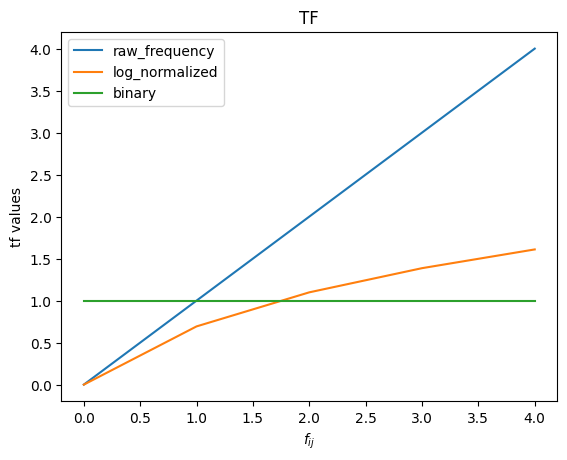

In [17]:
x = [x for x in range(0,5,1)]

y = x
z = [math.log(x+1, math.e) for x in range(0,5,1)]
w = [1 for x in range(0,5,1)]

plt.plot(x, y, label="raw_frequency")
plt.plot(x, z, label="log_normalized")
plt.plot(x, w, label="binary")

plt.legend(loc='upper left')
plt.ylabel('tf values')
plt.xlabel('$f_{ij}$')
plt.title('TF')

plt.show()

### IDF Visualisation

In [18]:
def plot_idf(N):
    x = [x for x in range(1,N+1,1)]

    y = [math.log(N / df, math.e) for df in range(1,N+1,1)]
    z = [math.log(1 + (N / df), math.e) for df in range(1,N+1,1)]
    w = [1 for df in range(1,N+1,1)]

    plt.plot(x, y, label="raw_idf")
    plt.plot(x, z, label="log_smoothed")
    plt.plot(x, w, label="binary")

    plt.legend(loc='upper right')
    plt.ylabel('idf values')
    plt.xlabel('$df_i$')
    plt.title('IDF for N=' + str(N))

    plt.show()

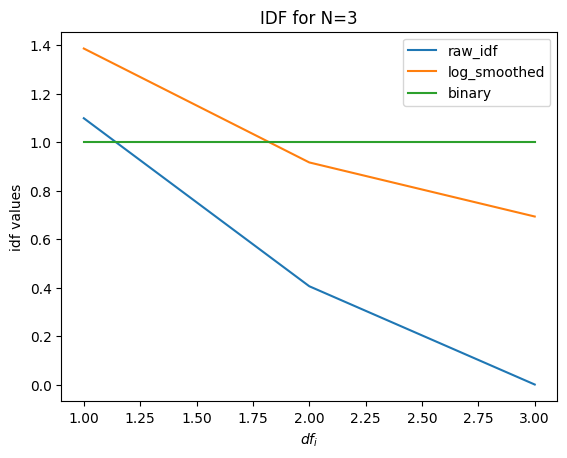

In [19]:
plot_idf(3)

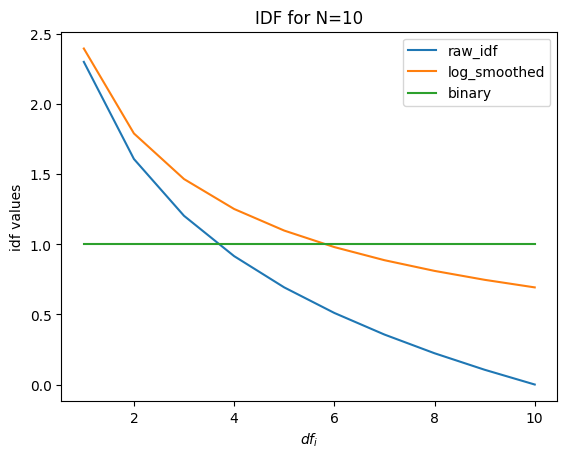

In [20]:
plot_idf(10)

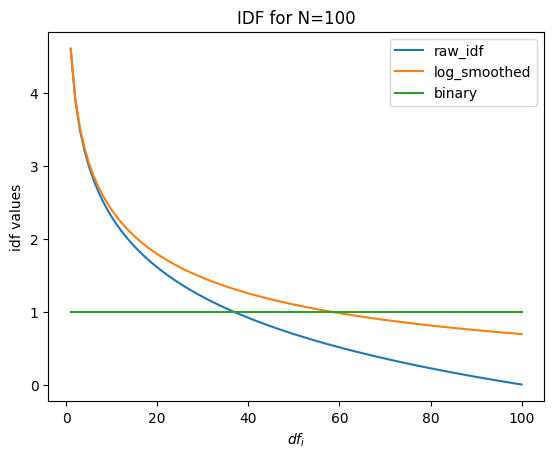

In [21]:
plot_idf(100)